# Twitter Sentiment Analysis Usinng Tweepy and TextBlob

In [78]:
import tweepy
from textblob import TextBlob
consumer_key = 'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)
# public_tweets = api.search('Donald Trump')
# for tweet in public_tweets:
#     print(tweet.text)
#     analysis = TextBlob(tweet.text)
#     print(analysis.sentiment)

RT @JoeBiden: Donald Trump is going to court to stop votes from being counted. We have assembled the largest election protection effort in…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @USATODAY: Editor-in-chief @nicole_carroll on pulling the livestream of President Donald Trump's remarks tonight. https://t.co/GPrQudnFjj
Sentiment(polarity=0.0, subjectivity=0.0)
RT @JoeBiden: Donald Trump is going to court to stop votes from being counted. We have assembled the largest election protection effort in…
Sentiment(polarity=0.0, subjectivity=0.0)
@NumbersMuncher Donald Trump is a farter??
Sentiment(polarity=0.0, subjectivity=0.0)
🗳️🇺🇸Cada minuto que pasa se sigue acortando la diferencia entre Donald Trump y Joe Biden en Georgia.

⚠️2496 votos… https://t.co/AkLR5yDnxg
Sentiment(polarity=0.0, subjectivity=0.0)
RT @NTN24: “No vamos a permitir que la corrupción se robe unas elecciones tan importantes”: Donald Trump #Elecciones2020 

🔴 SEÑAL EN VIVO…
Sentiment(polarity=0.0, subjectivity=0.0)
RT @

In [79]:
posts = api.user_timeline(screen_name = 'BillGates', count = 500, lang = 'en', tweet_code = 'extended')

## for refernce we are printing forst 5 tweets

for tweet in posts[0:5]:
    print(tweet.text + '\n')

Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But rega… https://t.co/wGSCJYxxY1

@MohamedBinZayed The UAE is an essential partner in stopping polio in Pakistan. Thank you @MohamedBinZayed for your… https://t.co/5xQEZ8CpUL

For decades, @Rotary has worked tirelessly to #EndPolio. Today, the health infrastructure they’ve built around the… https://t.co/vYYV7djNsE

RT @StephenCurry30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

I’ve been working for some time on a book about what we need to do over the next decade to avoid a climate disaster… https://t.co/UvV6cRjxOW



In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
df = pd.DataFrame([tweet.text for tweet in posts], columns = ['Tweets'], dtype='string')
df.head()

,Tweets
0,"Here in Washington, we always vote by mail. It..."
1,@MohamedBinZayed The UAE is an essential partn...
2,"For decades, @Rotary has worked tirelessly to ..."
3,RT @StephenCurry30: Even with his busy schedul...
4,I’ve been working for some time on a book abou...


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  200 non-null    string
dtypes: string(1)
memory usage: 1.7 KB


In [83]:
import re

In [84]:
## Create a function to clean Dataset

def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Tweets'] = df['Tweets'].apply(CleanText)

df.head()

,Tweets
0,Here in Washington we always vote by mail Its ...
1,The UAE is an essential partner in stopping p...
2,For decades has worked tirelessly to EndPolio...
3,Even with his busy schedule Dr Fauci took the...
4,Ive been working for some time on a book about...


In [88]:
## Create a function to get subjectivity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Create a function to get polarity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

## create two new columns

df['subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)
df.head()

,Tweets,subjectivity,Polarity
0,Here in Washington we always vote by mail Its ...,0.408333,0.30000
1,The UAE is an essential partner in stopping p...,0.300000,0.00000
2,For decades has worked tirelessly to EndPolio...,0.000000,0.00000
3,Even with his busy schedule Dr Fauci took the...,0.374868,0.07672
4,Ive been working for some time on a book about...,0.000000,0.00000


In [89]:
## Create a function to calculate Negative, Positive, neutral

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df.head()

,Tweets,subjectivity,Polarity,Analysis
0,Here in Washington we always vote by mail Its ...,0.408333,0.30000,Positive
1,The UAE is an essential partner in stopping p...,0.300000,0.00000,neutral
2,For decades has worked tirelessly to EndPolio...,0.000000,0.00000,neutral
3,Even with his busy schedule Dr Fauci took the...,0.374868,0.07672,Positive
4,Ive been working for some time on a book about...,0.000000,0.00000,neutral


In [90]:
a = []
a = df['Analysis'].value_counts()
print(a)
print(type(a))

Positive    119
neutral      57
Negative     24
Name: Analysis, dtype: int64
<class 'pandas.core.series.Series'>


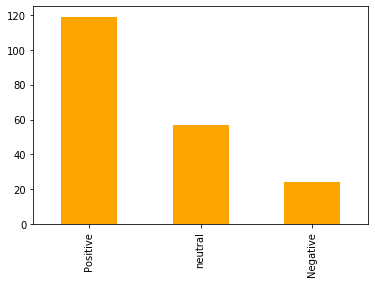

In [98]:
df['Analysis'].value_counts().plot(kind = 'bar',color = 'orange')

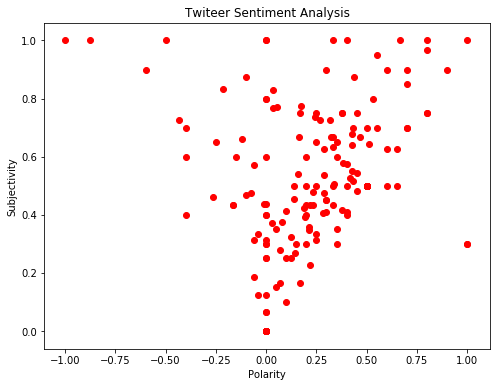

In [100]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['subjectivity'][i],color = 'red')
    
plt.title('Twiteer Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

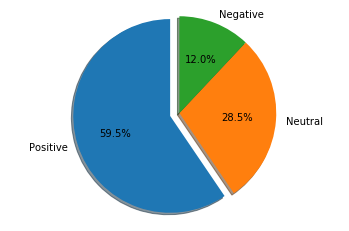

In [101]:
labels = 'Positive', 'Neutral','Negative'

p  = a[0]
neu = a[1]
neg = a[2]
sizes = [p,neu,neg]
explode = (0.1,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()